<a href="https://colab.research.google.com/github/Atharva-D/Moodify/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset**

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishikakolambe","key":"e0e8fe210dffe3a5b3585cd5ed0c6d20"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:05<00:00, 28.7MB/s]
100% 121M/121M [00:05<00:00, 24.5MB/s]


#**Unzipping the dataset**

In [7]:

!unzip face-expression-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

#**Importing necessary libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#**Training Data**

In [9]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/images/images/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

#**Testing Data**

In [10]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/images/images/validation", 
                                           target_size=(224,224), 
                                           batch_size=32)
val_data.class_indices

Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# **Visualize the images in the training data**

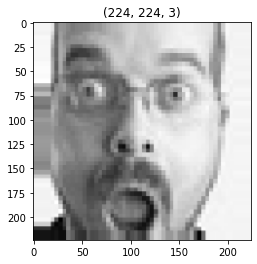

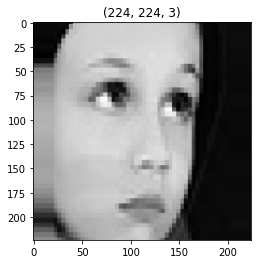

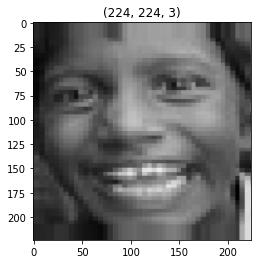

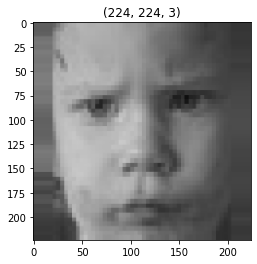

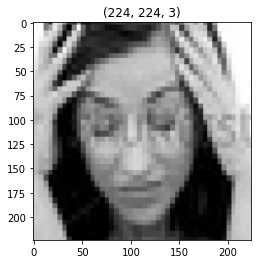

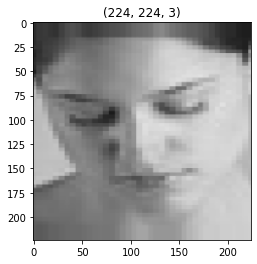

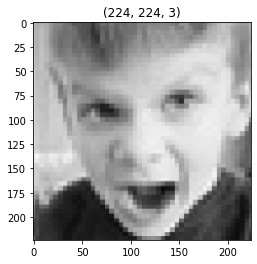

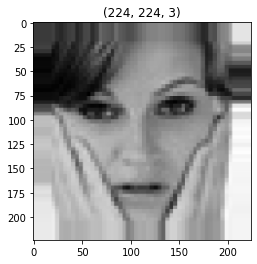

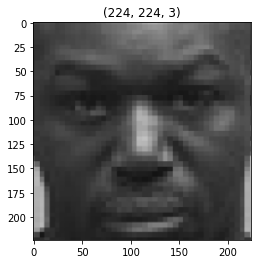

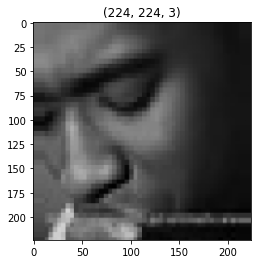

In [11]:
t_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)


#**Using MobileNet for its pre-trained weights**


In [12]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)



17235968/17225924 [==============================] - 0s 0us/step


# **Creating our model.**


In [13]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

#**Training the model**

In [14]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 100, 
                           validation_data= val_data, 
                           validation_steps= 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
10/10 [==============================] - 16s 417ms/step - loss: 15.1733 - accuracy: 0.2156 - val_loss: 10.7365 - val_accuracy: 0.2344
Epoch 2/100
10/10 [==============================] - 4s 393ms/step - loss: 10.5865 - accuracy: 0.3063 - val_loss: 7.5541 - val_accuracy: 0.3781
Epoch 3/100
10/10 [==============================] - 4s 390ms/step - loss: 8.5293 - accuracy: 0.3438 - val_loss: 6.8660 - val_accuracy: 0.4344
Epoch 4/100
10/10 [==============================] - 4s 397ms/step - loss: 7.6181 - accuracy: 0.4031 - val_loss: 6.2598 - val_accuracy: 0.4375
Epoch 5/100
10/10 [==============================] - 4s 393ms/step - loss: 5.5234 - accuracy: 0.4563 - val_loss: 5.0936 - val_accuracy: 0.4156
Epoch 6/100
10/10 [==============================] - 4s 382ms/step - loss: 5.2514 - accuracy: 0.4375 - val_loss: 7.1975 - val_accuracy: 0.4500
Epoch 7/100
10/10 [==============================] - 4s 389ms/step - loss: 5.2687 - accuracy: 0.4531 - val_loss: 6.6376 - val_accuracy: 0.

#**Saving the built Model**

In [15]:
# Save the model in h5 format 
model.save('final_model.h5')

#**Train accuracy v/s Testing accuracy**

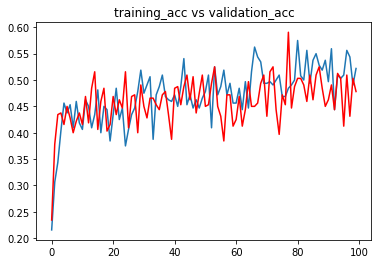

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

#**Training Loss v/s Testing Loss**

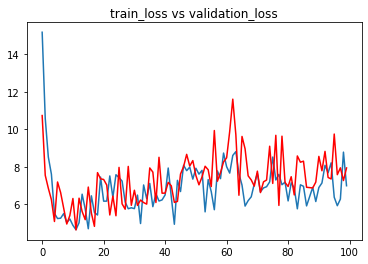

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

# **Testing the model using images**

In [18]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of angry


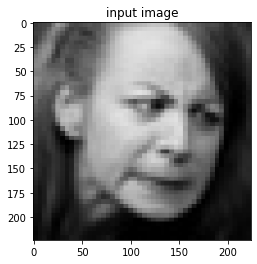

In [19]:
# path for the image to see if it predics correct class

path = "/content/images/images/validation/angry/10052.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()